# LEEMOS LA IMAGEN

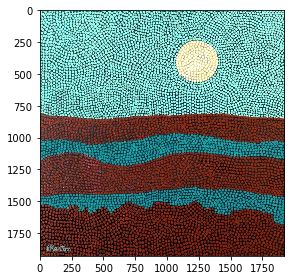

In [1]:
import numpy as np
import cv2
from skimage import data, color
from skimage import io
import matplotlib.pyplot as plt

# Cargamos la imagen
original = io.imread('Pintura_Puntos.jpg')
io.imshow(original)

# ESCOGE UN ESPACIO DE COLOR APROPIADO

**Visita la siguiente página:**

https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0

**Sustituye las XXX**

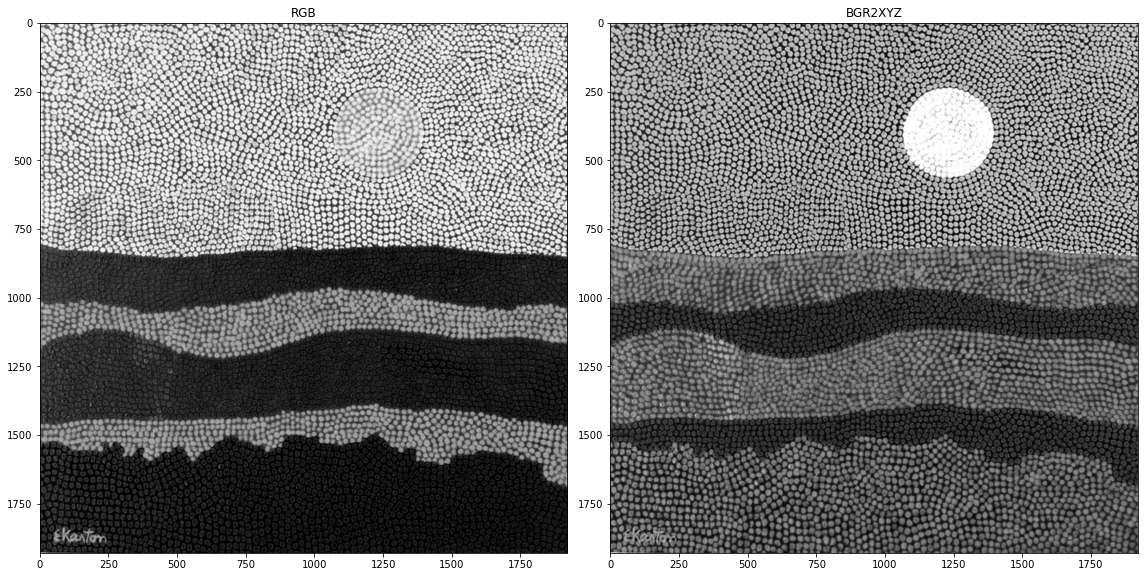

In [2]:
# Aquí... BGR2HSV BGR2XYZ BGR2YCrCb
image = cv2.cvtColor(original, cv2.COLOR_BGR2XYZ)
#image = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)
#image = cv2.cvtColor(original, cv2.COLOR_BGR2YCrCb)

# Visualizamos las dos imágenes
f, axes = plt.subplots(1, 2, figsize=(16, 16))
axes[0].imshow(original[:,:,2], cmap='gray', aspect='equal')
axes[0].set_title('RGB')
axes[1].imshow(image[:,:,2], cmap='gray', aspect='equal')
# ...Y aquí
axes[1].set_title('BGR2XYZ')

plt.tight_layout()
plt.show()


# RELLENA LOS HUECOS

**1: Escoge uno de los tres canales**

**2: Escoge el tamaño del kernel de mediana**

**3: Para el punto 3 visita la siguiente página:**

https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

Text(0.5, 1.0, 'dst3')

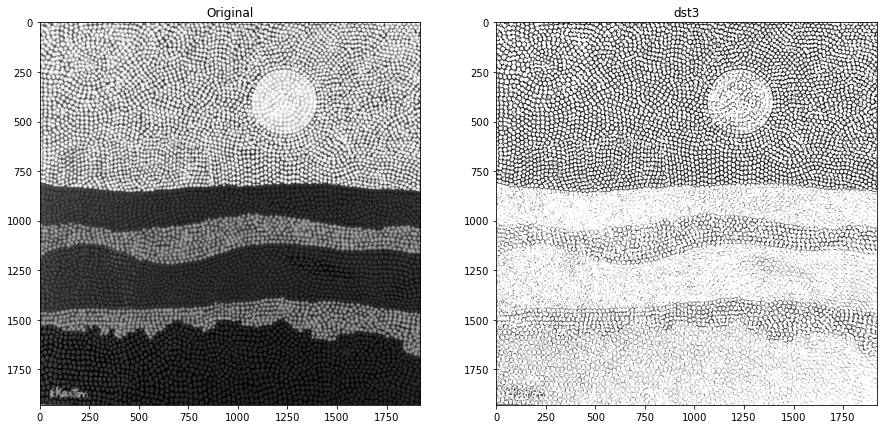

In [3]:
# 1: Escoge uno de los tres canales
uno, dos, tres = cv2.split(image)
canal = dos
X = 5
# 2: Escoge el tamaño X del filtro de mediana
canal = cv2.medianBlur(canal, X)

# 3: Escoge una función de threshold (y sus parámetros X) 
#ret,dst3 = cv2.threshold(canal, X, 255, cv2.THRESH_BINARY)
#ret,dst3 = cv2.threshold(canal, X, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
dst3 = cv2.adaptiveThreshold(canal, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, X, X)
#dst3 = cv2.adaptiveThreshold(canal, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, X, X)


# Visualizamos los resultados obtenidos
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(canal, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[1].imshow(dst3, cmap=plt.cm.gray)
ax[1].set_title('dst3')


# UTILIZAMOS FILTROS MORFOLÓGICOS PARA DIFERENCIAR BIEN LOS OBJETOS QUE DESEAMOS CONTAR
## HAS DE ESCOGER LOS ELEMENTOS ESTRUCTURALES, EL TAMAÑO X, LOS FILTROS, Y LA COMBINACIÓN DE TODOS ELLOS

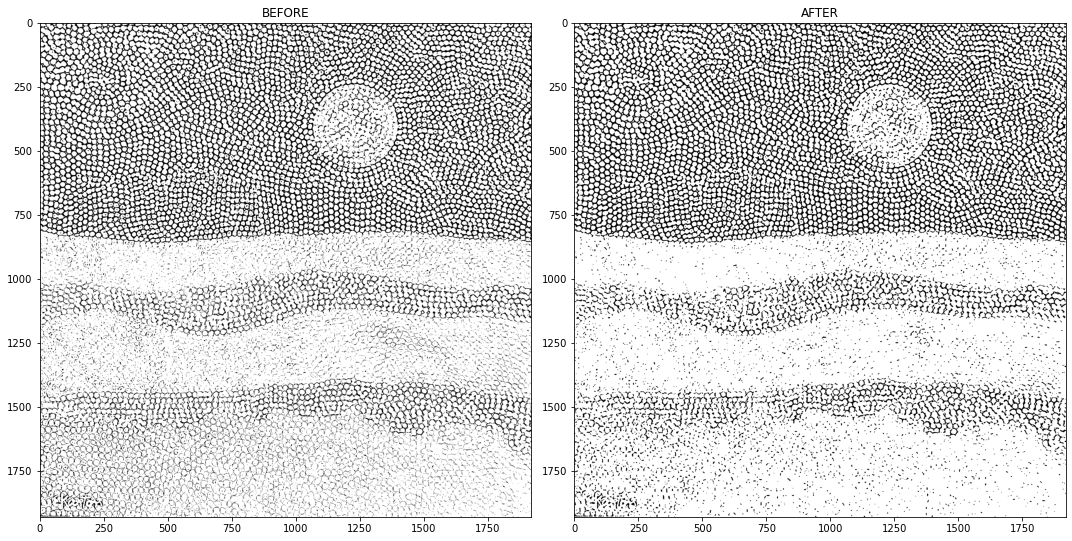

In [4]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing

# Elementos estructurales
from skimage.morphology import disk, diamond, ball, cube, octahedron, star

# Aplicamos filtros morfológicos
im1 = dst3
im2 = opening(image=im1)
im3 = closing(image=im2)
#erosion_dilation_opening_closing(image=im1, selem=disk_diamond_ball_cube_octahedron_star(X))
#im3 = ...(image=im2, selem=...(...))
#im4 = 
# ....
# Añade tantas líneas como consideres

# Visualizamos el resultado tras aplicar las operaciones morfológicas
# En AFTER usa la última imagen imx obtenida
f, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(im1, cmap='gray', aspect='equal')
axes[0].set_title('BEFORE')
axes[1].imshow(im3, cmap='gray', aspect='equal')
axes[1].set_title('AFTER')

plt.tight_layout()
plt.show()

# APLICAMOS EL ALGORITMO DE CANNY PARA DETECTAR OBJETOS

**Utiliza como entrada la última imagen imx obtenida en la celda anterior**

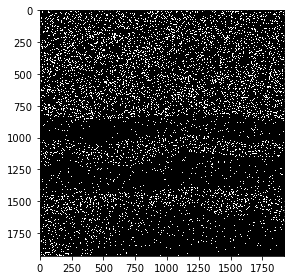

In [5]:
# Detectamos los bordes con Canny
canny = cv2.Canny(im3, 100, 100)
 
io.imshow(canny) 


# CONTAMOS CÍRCULOS

In [ ]:
# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
# Mostramos el número de puntos por consola
print("He encontrado {} objetos".format(len(contornos)))
 
cv2.drawContours(original,contornos,-1,(0,0,255), 2)
cv2.imshow("contornos", original)
 
cv2.waitKey(0)

He encontrado 7631 objetos


# ¿CUÁNTOS HAS CONTADO? ESCRIBE AQUÍ EL NÚMERO OBTENIDO:
# 'BGR2XYZ ': 11099 círculos ; 'BGR2HSV': 9838 círculos.

Al realizar la práctia el número de círculos varía de acuerdo al espacio de color usado. Es así que cuando se usa el espacio de color 'BGR2XYZ' la cantidad de círculos encontraod en la imagen es de 11099 círculos; sin embargo, cuando se cambia el espacio de color a 'BGR2HSV' la cantidad de círculos disminuye a 9838 círculos.
Adicionalmente se realizó la práctica con el espacio de color 'BGR2YCrCb', pero al final se descartó pues indicaba que no existía circulos en la imagen de prueba.

Por otro lado, dependiendo del canal de color que se selecciones tendrá mayor o menor detalle de los puntos en la imagen y por ende se indetificará más o menos cantidad de círculos; así pues, el canal que da más detalle es el canal tres de la imagen. Este se puede verificar si se selecciona el canal uno con el espacio de color 'BGR2XYZ', de esa manera solo se obtienen 7436 círculos. Ahora bien, si se selecciona el canal dos con el mismo espacio de color se obtienen 7631 círculos.